Check if highly expressed genes in scRNAseq data are corrected as function of different parameters:

In [4]:
import sys,os
path = '/nfs/team283/aa16/InSituCellTools/'
os.chdir(path)
sys.path.append(path)

In [5]:
import pickle
import anndata
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import diffxpy.api as de
from IPython.display import Image
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cuda,floatX=' + data_type + ',force_device=True' + ',dnn.enabled=False'
from isctools.ProbeCounts__GeneralModel_V2_SmoothedOverdispersion import ProbeCounts_GeneralModel_V2
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda: Tesla V100-SXM2-32GB (0000:62:00.0)


In [70]:
n_factors = 15
backgroundUncertainty = 1.0
overdispersionUncertainty = 0.01
expressionLevelUncertainty = 1.0

In [71]:
model = pickle.load(open('/nfs/team283/aa16/InSituCellTools/benchmarking/fitted_models/model_datasize74' +
                         'nfactors' + str(n_factors) +
                         'backgroundUncertainty' + str(backgroundUncertainty) +
                         'NEWoverdispersionUncertainty' + str(overdispersionUncertainty) +
                         'expressionLevelUncertainty' + str(expressionLevelUncertainty) + '.p', 'rb'))

In [72]:
model.sample_posterior(node='all', n_samples=50, save_samples=False);

In [75]:
ProbeCounts_GeneralModel_V2.compute_X_corrected(model)

TypeError: compute_X_corrected() got an unexpected keyword argument 'correction'

In [38]:
rankedGenes = model.rank_X_corrected_genes()
rankedGenes

,Gene,Total Counts,Removed Counts,Fraction Removed Counts (Mean),Fraction Removed Counts (q05),Fraction Removed Counts (q95)
OBP2A,OBP2A,24213,23611,0.975137,0.965721,0.981787
PPP4R3B,PPP4R3B,16775,16305,0.971982,0.962921,0.978897
ZNF768,ZNF768,22028,21407,0.971809,0.964364,0.979254
DLST,DLST,26617,25858,0.971484,0.960965,0.980576
TOMM5,TOMM5,14850,14423,0.971246,0.961010,0.979394
...,...,...,...,...,...,...
DMTN,DMTN,5096,0,0.000000,0.000000,0.000196
GPR22,GPR22,6815,0,0.000000,0.000000,0.000440
NEBL,NEBL,6403,0,0.000000,0.000000,0.000000
LRRN4,LRRN4,5644,0,0.000000,0.000000,0.000709


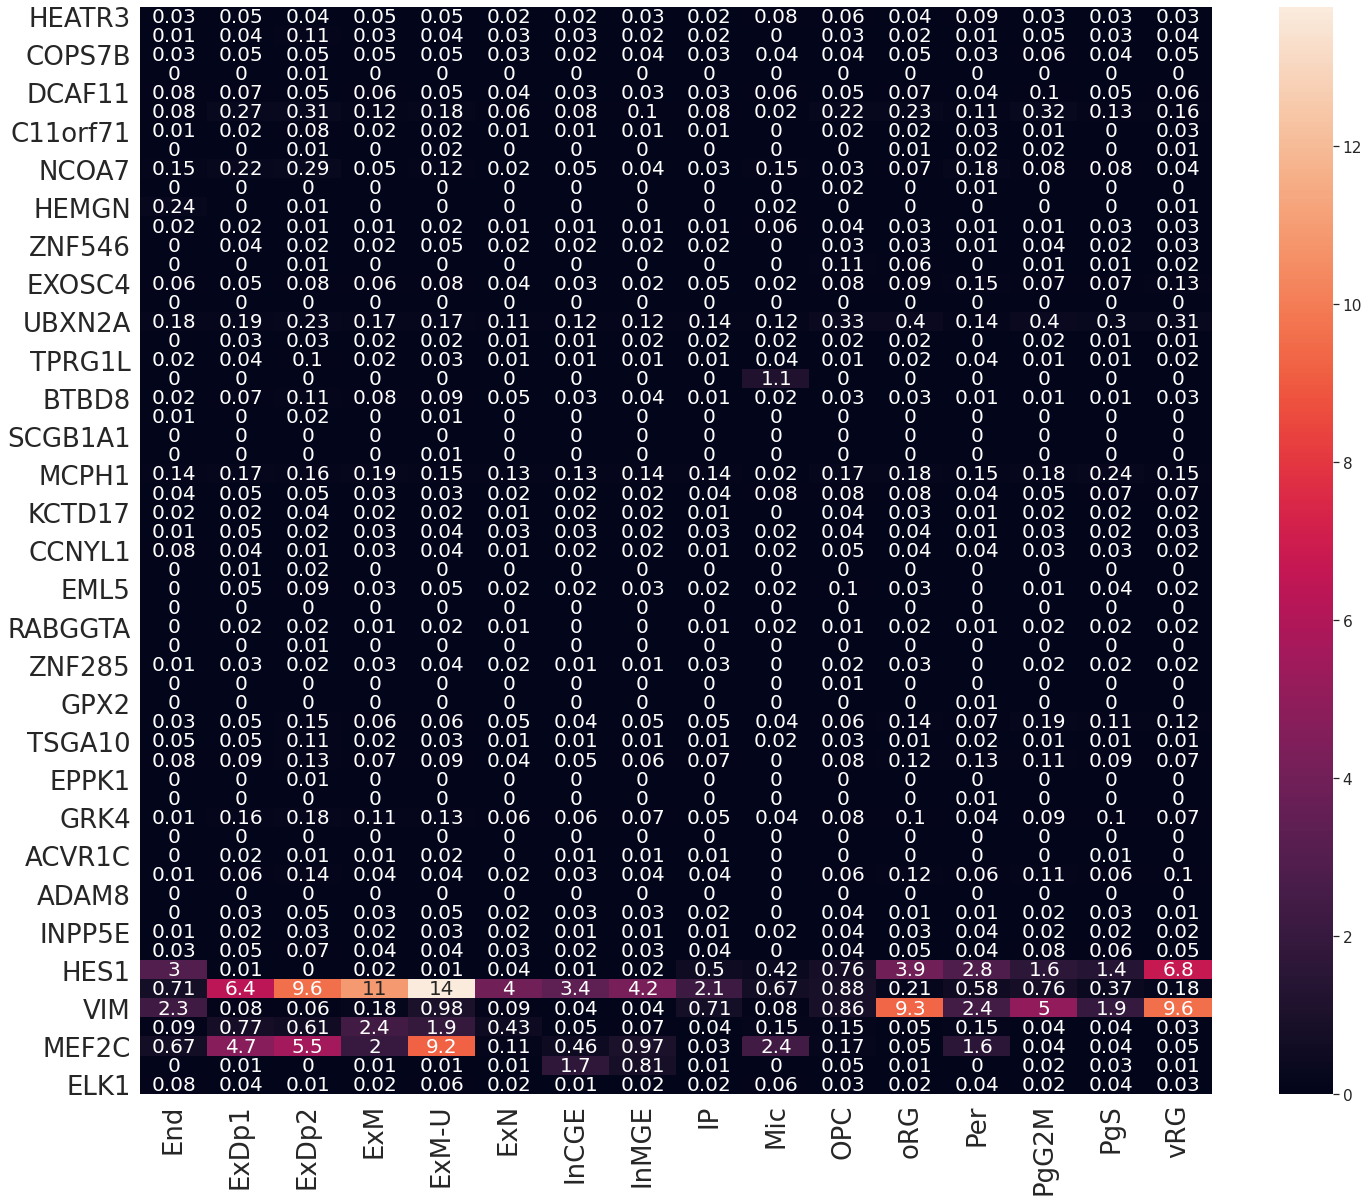

In [32]:
# Get reference scRNAseq data:
meanExpression_sc = pd.read_csv(path + "data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)

# Make our gene list:
commonGenes = [rankedGenes['Gene'].iloc[i] for i in range(len(rankedGenes)) if rankedGenes['Gene'].iloc[i] in meanExpression_sc.index]
topGenes = commonGenes[0:50]
celltypeMarkers = np.array(('HES1', 'STMN2','VIM', 'SATB2', 'MEF2C', 'DLX1', 'ELK1'))
lookup_genes = np.concatenate([topGenes, celltypeMarkers])

# Plot cell type specific expression of genes:
fig, ax = plt.subplots(figsize=(24,20))
sns.set(font_scale=1.4)
sns.heatmap(np.round(meanExpression_sc.loc[lookup_genes,:],2), annot = True,  annot_kws={"size": 20})

In [33]:
np.mean(np.mean(meanExpression_sc.loc[commonGenes,:], axis = 1))

0.10893298750644426

In [34]:
np.mean(np.mean(meanExpression_sc.loc[topGenes,:], axis = 1))

0.06103511614150345

In [51]:
meanExpression_sc.loc[topGenes,:].iloc[np.argsort(-np.mean(meanExpression_sc.loc[topGenes,:], axis = 1))]

,End,ExDp1,ExDp2,ExM,ExM-U,ExN,InCGE,InMGE,IP,Mic,OPC,oRG,Per,PgG2M,PgS,vRG
EIF5,0.362869,0.712114,0.783133,0.821116,0.692483,0.531566,0.547420,0.558358,0.518605,0.854167,0.673203,0.995360,0.614035,1.214388,1.006494,1.152439
SUMO1,0.160338,0.443355,0.614458,0.368560,0.423121,0.230915,0.208508,0.272141,0.313023,0.083333,0.339869,0.447796,0.342105,0.513669,0.584416,0.408537
DHX29,0.105485,0.407553,0.493976,0.306149,0.317768,0.164382,0.177824,0.228739,0.160000,0.250000,0.316993,0.211137,0.254386,0.270504,0.211851,0.167683
UBXN2A,0.177215,0.186856,0.234940,0.173081,0.174829,0.105953,0.116457,0.123754,0.137209,0.125000,0.333333,0.395978,0.140351,0.400000,0.297078,0.306911
LYRM7,0.080169,0.272683,0.313253,0.116270,0.182802,0.062731,0.077406,0.099707,0.080930,0.020833,0.215686,0.229698,0.105263,0.316547,0.129058,0.160569
MCPH1,0.143460,0.171653,0.156627,0.188251,0.145786,0.126963,0.129707,0.136070,0.135814,0.020833,0.169935,0.181748,0.149123,0.179856,0.239448,0.147358
NCOA7,0.151899,0.215792,0.289157,0.053960,0.122437,0.021311,0.048815,0.043988,0.033953,0.145833,0.026144,0.068832,0.175439,0.083453,0.081981,0.040650
GRK4,0.008439,0.156940,0.180723,0.105885,0.134396,0.058629,0.064156,0.067449,0.046512,0.041667,0.084967,0.098995,0.035088,0.089209,0.099838,0.072154
ISCA2,0.025316,0.053458,0.150602,0.061087,0.060364,0.052226,0.039749,0.046921,0.053488,0.041667,0.055556,0.141531,0.070175,0.187050,0.109578,0.121951
PSMF1,0.080169,0.088769,0.126506,0.068621,0.088838,0.042921,0.049512,0.056305,0.065581,0.000000,0.075163,0.118329,0.131579,0.113669,0.091721,0.072154


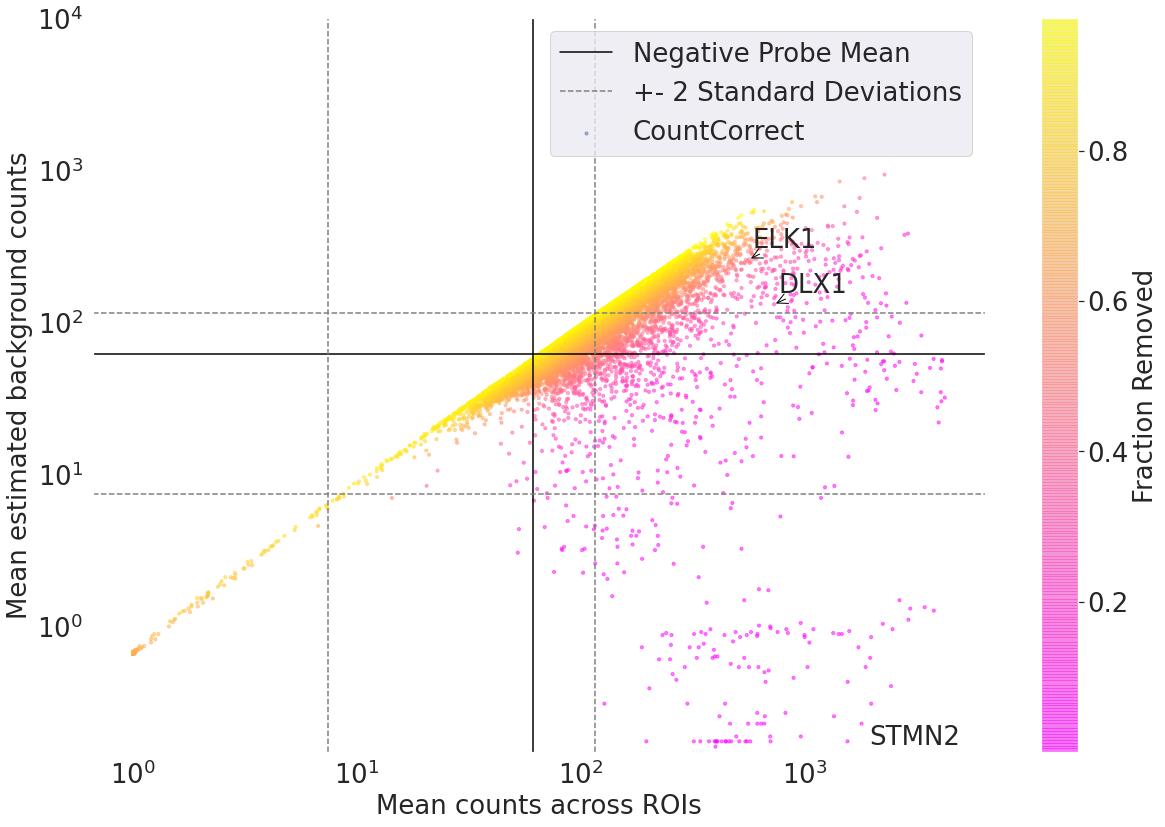

In [74]:
genesOfInterest = np.array(('DLX1', 'STMN2', 'ELK1'))
ProbeCounts_GeneralModel_V2.plot_X_corrected_overview5(model, genesOfInterest, cmap = 'spring')